In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
COLOR = 'white'
mpl.rcParams['text.color'] = "black"
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

MC Run

In [20]:
import pickle
with open('2_saved_runs/df_scores_221118_v3.pickle', 'rb') as handle:
    df_scores = pickle.load(handle)
with open('2_saved_runs/MC_run_221118_v2.pickle', 'rb') as handle:
    results_mc = pickle.load(handle)
df_results, model_data = results_mc["df_results"], results_mc["model_data"]

In [3]:
pd.set_option('display.max_rows', None)
df = df_results
df.loc[(df.init_routine == "OPTICS") & (df.N_cluster <10) & (df.total_execution_time > 30)]

,model_idx,iterations,execution_time,total_execution_time,total_iterations,em_model_idx,reiterations,dataset,init_routine,N_cluster,True_N_Cluster,ll_score,AIC_score,BIC_score,MML_score,silhouette_score,CH_score
18251,18251,1000,42.869618,42.869618,1000,71,0,1,OPTICS,8,3,-143.463438,175.463438,231.086855,186.584460,0.121980,787.163241
18764,18764,442,30.683858,30.683858,442,54,0,7,OPTICS,7,3,-15.889052,43.889052,88.974034,46.852510,0.020145,117.055741
18769,18769,1000,31.553901,31.553901,1000,59,0,7,OPTICS,7,3,-28.916843,56.916843,102.001825,59.229513,-0.030568,106.340063
18772,18772,462,33.003173,33.003173,462,62,0,7,OPTICS,7,3,-15.445454,43.445454,88.530436,46.408036,0.020145,117.055741
18773,18773,263,32.600982,32.600982,263,63,0,7,OPTICS,8,3,-18.780411,50.780411,102.306104,51.281854,-0.002594,100.807241
18774,18774,1000,30.409101,30.409101,1000,64,0,7,OPTICS,8,3,-41.563757,73.563757,125.089450,77.145766,0.018448,274.118702
18775,18775,367,34.965737,34.965737,367,65,0,7,OPTICS,8,3,-29.502899,61.502899,113.028592,66.235623,0.123613,379.390386
18776,18776,721,32.703219,32.703219,721,66,0,7,OPTICS,8,3,-41.512199,73.512199,125.037892,77.077912,0.018448,274.118702
18777,18777,681,41.271611,41.271611,681,67,0,7,OPTICS,8,3,-44.415370,76.415370,127.941063,80.528251,-0.065070,157.183563
18779,18779,366,30.808465,30.808465,366,69,0,7,OPTICS,8,3,-29.152224,61.152224,112.677917,65.869343,0.123613,379.390386


In [27]:
pd.set_option('display.max_rows', 20)
df_scores = df_scores[df_scores.init_routine == "random_inside"]

In [28]:
pd.set_option('display.max_columns', 20)
df_scores[df_scores.dataset == 0].ll_rank.unique()

array([  1,   2,   5,   6,   7,   8,   3,   4,  12,  11,  15,  18,   9,
        10,  13,  25,  26,  27,  28,  21,  29,  30,  20,  31,  16,  17,
        32,  14,  24,  35,  22,  23,  19,  39,  33,  36,  42,  54,  43,
        44,  57,  34,  45,  46,  38,  47,  48,  71,  58,  49,  37,  50,
        51,  40,  55,  41,  72,  53,  52,  59,  62,  81,  82,  66,  60,
        56,  83,  84,  73,  85,  63,  86,  61,  64,  68,  67,  78,  70,
        69,  79,  74,  87,  65,  88,  89,  90,  80,  91,  76,  77,  92,
        75,  93,  94,  95,  96,  97,  98,  99, 109, 100, 101, 102, 122,
       108, 120, 111, 112, 113, 114, 104, 115, 105, 106, 119, 107, 103,
       110, 116, 117, 123, 118, 121, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143])

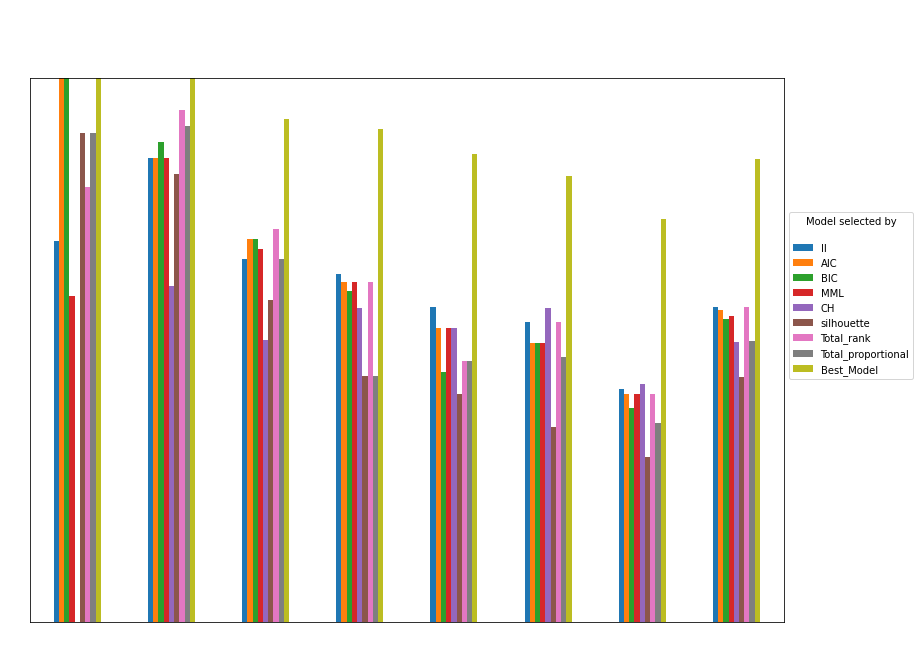

In [33]:
from plotting.mc_simulation.criteria.plot import plot_comparison_criteria
settings = {
    "sup_title_size": 25
}
fig, data = plot_comparison_criteria(df_scores, settings)
fig

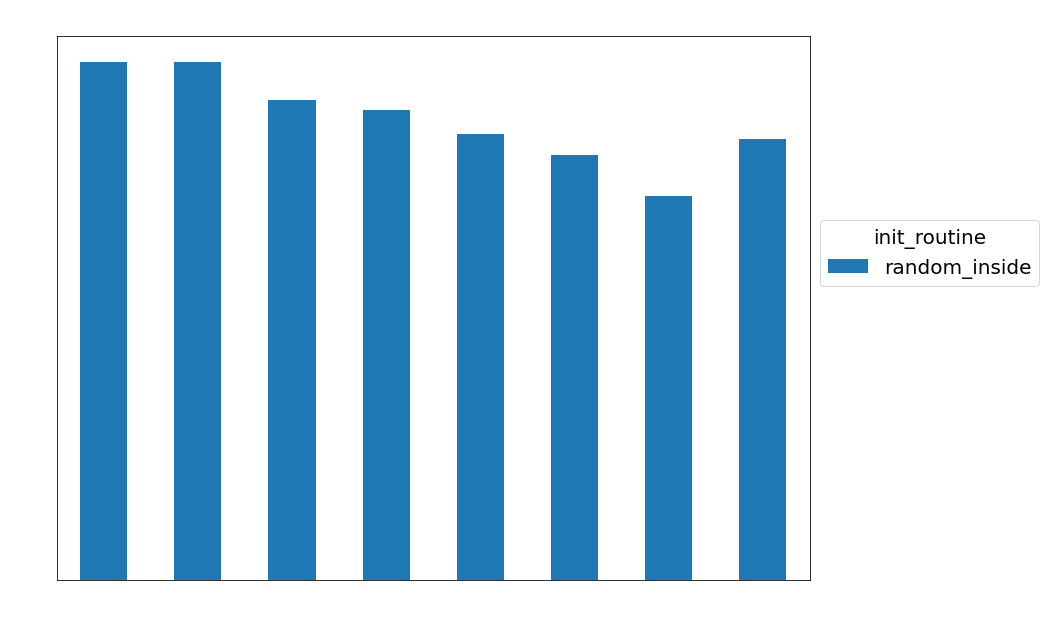

In [34]:
from plotting.mc_simulation.comparison_init_rout_best_model.plot import plot_init_routine_comparison_best_models
plot_init_routine_comparison_best_models(data)

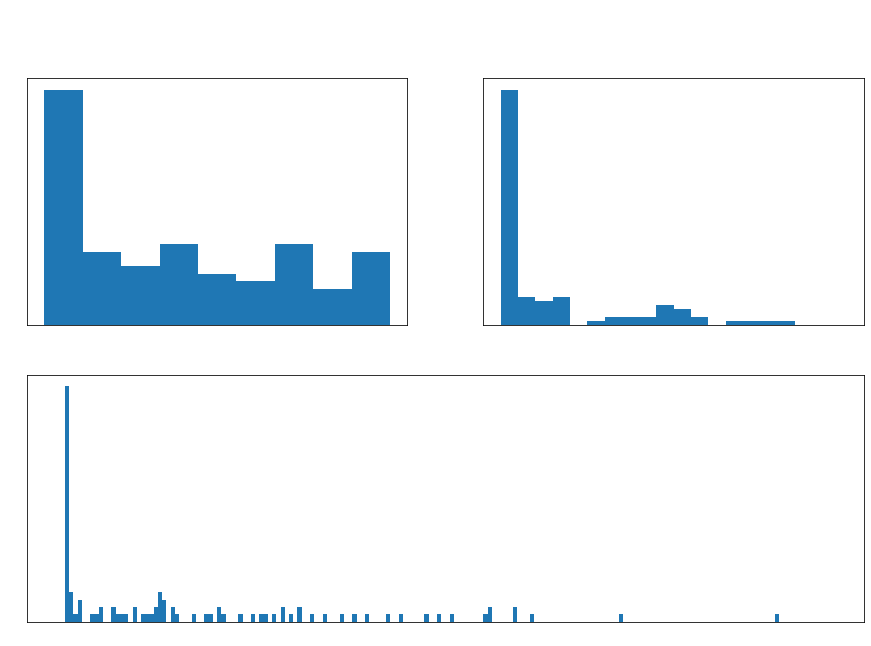

In [36]:
from plotting.mc_simulation.best_model_position.plot import plot_ranks_of_best_model
rank ="ll_rank" #"Total_rank_rank" #  "AIC_rank" #
init_routine = "random_inside"
#TODO CH_rank has best intra but worst inter rank profile -> more research
plot_ranks_of_best_model(df_scores, rank, init_routine)#)
    

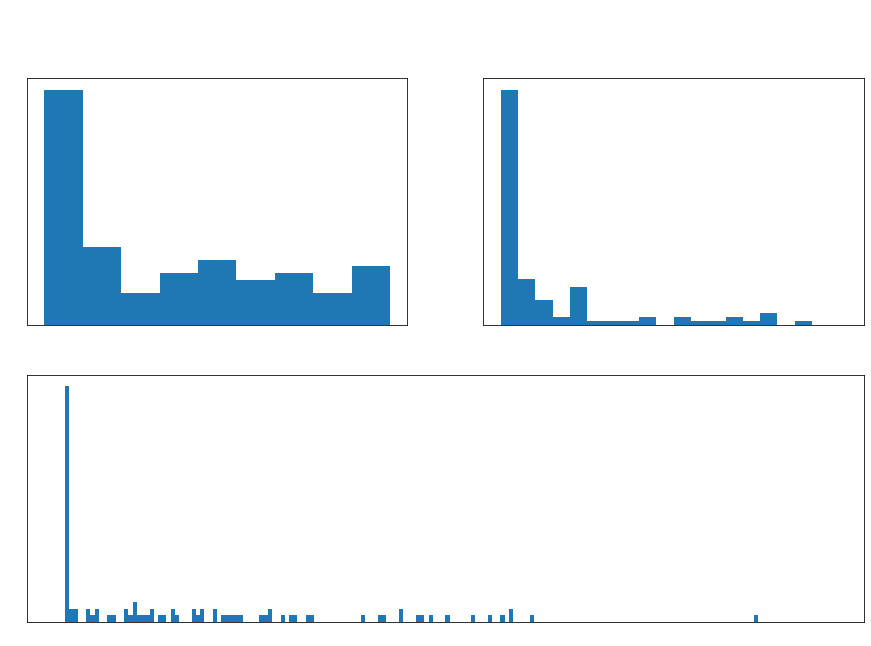

In [44]:
from plotting.mc_simulation.best_model_position.plot import plot_ranks_of_best_model
rank = "Total_rank_rank" # 
init_routine = "random_inside"
#TODO CH_rank has best intra but worst inter rank profile -> more research
plot_ranks_of_best_model(df_scores, rank, init_routine)#)

In [ ]:
df_select.loc[df_select.N_cluster.isin([6,7])]

,model_idx,iterations,execution_time,total_execution_time,total_iterations,em_model_idx,reiterations,dataset,init_routine,N_cluster,True_N_Cluster,ll_score,AIC_score,BIC_score,MML_score,silhouette_score,CH_score,Total_proportional_score,ll_rank,AIC_rank,BIC_rank,MML_rank,silhouette_rank,CH_rank,Total_proportional_rank,Total_rank_score,Total_rank_rank,number_identified_cluster
11458,11458,206,12.683238,12.695421,210,118,4,63,random_inside,6,7,125.563400,-101.563400,-59.450740,-89.662845,0.386368,484.093952,0.924287,32,36,56,35,42,71,94,201,37,4.0
11440,11440,144,8.824753,8.870451,158,100,14,63,random_inside,6,7,122.576582,-98.576582,-56.463922,-86.448779,0.411624,653.593662,0.927913,39,39,58,40,31,33,82,207,41,4.0
11447,11447,182,13.126346,13.136485,185,107,3,63,random_inside,6,7,122.566525,-98.566525,-56.453864,-86.438190,0.411624,653.593662,0.927913,40,40,59,41,31,33,83,211,43,4.0
11448,11448,31,2.723230,2.723230,31,108,0,63,random_inside,6,7,123.275563,-99.275563,-57.162903,-87.263883,0.380125,575.739817,0.923348,36,38,57,38,44,51,98,213,44,5.0
11443,11443,204,16.393513,16.410331,208,103,4,63,random_inside,6,7,122.526059,-98.526059,-56.413399,-86.393538,0.411624,653.593662,0.927912,41,41,60,42,31,33,84,215,46,4.0
11446,11446,83,5.883531,5.920221,92,106,9,63,random_inside,6,7,121.427036,-97.427036,-55.314376,-85.205835,0.420646,675.009583,0.929207,45,43,62,44,25,24,71,219,48,4.0
11452,11452,161,8.904837,8.957400,171,112,10,63,random_inside,6,7,122.523502,-98.523502,-56.410842,-86.391163,0.411624,653.593662,0.927912,42,42,61,43,31,32,85,219,48,4.0
11445,11445,104,7.656809,7.656809,104,105,0,63,random_inside,6,7,121.251707,-97.251707,-55.139047,-85.019657,0.420646,675.009583,0.929204,46,44,63,45,25,23,72,223,50,4.0
11444,11444,84,5.683420,5.696946,87,104,3,63,random_inside,6,7,120.468481,-96.468481,-54.355821,-84.135460,0.429437,696.449771,0.930470,47,45,64,48,20,15,65,224,51,4.0
11469,11469,58,4.881939,4.881939,58,129,0,63,random_inside,7,7,122.259837,-94.259837,-45.128401,-84.840189,0.387583,561.371411,0.924360,43,48,71,46,41,54,93,249,58,5.0


In [ ]:
df_new = df_select.loc[df_select.N_cluster ==5]
#df_new["new_total"] = df_new["ll_rank"] +  df_new["CH_rank"]
df_new#.sort_values("new_total")

,model_idx,iterations,execution_time,total_execution_time,total_iterations,em_model_idx,reiterations,dataset,init_routine,N_cluster,True_N_Cluster,ll_score,AIC_score,BIC_score,MML_score,silhouette_score,CH_score,Total_proportional_score,ll_rank,AIC_rank,BIC_rank,MML_rank,silhouette_rank,CH_rank,Total_proportional_rank,Total_rank_score,Total_rank_rank,number_identified_cluster
13597,13597,172,8.831440,8.841288,175,97,3,75,random_inside,5,6,161.487842,-141.487842,-105.139946,-129.004970,0.230411,526.556303,0.902195,40,39,39,39,12,56,64,169,39,4.0
13586,13586,224,7.957229,7.957229,224,86,0,75,random_inside,5,6,161.483141,-141.483141,-105.135245,-128.999571,0.230411,526.556303,0.902195,41,40,40,40,12,56,65,173,40,4.0
13593,13593,500,7.720415,7.733173,505,93,5,75,random_inside,5,6,160.335644,-140.335644,-103.987748,-128.237830,0.223135,356.065490,0.901124,42,41,41,41,16,76,68,181,41,4.0
13592,13592,439,6.646247,6.646247,439,92,0,75,random_inside,5,6,135.730601,-115.730601,-79.382705,-100.766455,0.252590,766.852744,0.905050,66,59,48,60,7,31,58,240,46,4.0
13583,13583,255,9.362314,9.371349,257,83,2,75,random_inside,5,6,135.692753,-115.692753,-79.344857,-100.724730,0.252590,766.852744,0.905049,67,60,49,61,7,31,59,244,47,4.0
13587,13587,199,7.718600,7.721141,200,87,1,75,random_inside,5,6,135.616375,-115.616375,-79.268479,-100.641525,0.252590,766.852744,0.905048,68,61,50,62,7,31,60,248,48,4.0
13595,13595,443,9.115700,9.118157,444,95,1,75,random_inside,5,6,152.672266,-132.672266,-96.324370,-119.865344,-0.010483,355.810601,0.867084,47,42,42,42,84,77,144,257,50,4.0
13591,13591,27,1.457436,1.457436,27,91,0,75,random_inside,5,6,130.983625,-110.983625,-74.635729,-97.466227,0.286760,443.132093,0.909951,72,65,54,66,5,67,56,262,52,4.0
13589,13589,512,12.760261,12.780601,520,89,8,75,random_inside,5,6,147.870907,-127.870907,-91.523011,-114.930466,-0.010635,355.046022,0.866995,50,45,43,45,85,78,145,268,54,4.0
13581,13581,253,7.077749,7.082323,254,81,1,75,random_inside,5,6,147.860554,-127.860554,-91.512657,-114.918573,-0.010635,355.046022,0.866995,51,46,44,46,85,78,146,272,55,4.0


In [ ]:
pd.set_option('display.max_columns', None)
#cols = [ 'param_index', 'll', 'AIC', 'BIC', 'silhouette', 'll_rank', 'AIC_rank', 'BIC_rank',"TOTAL_rank", 'silhouette_rank',"CH_rank", 'identified_cluster', "N_cluster",'True_Cluster_number']
dataset = 75
init_routine = "random_inside"
criterion = "Total_rank_rank"

df_select = df_scores.loc[(df_scores.dataset == dataset) & (df_scores.init_routine == init_routine),:].sort_values(criterion)
#df_select = df_select[df_select.identified_cluster == df_select.identified_cluster.max()]
print(f"best model: {int(df_select.number_identified_cluster.max())} identified clusters")
df_select.iloc[0:20]


best model: 5 identified clusters


,model_idx,iterations,execution_time,total_execution_time,total_iterations,em_model_idx,reiterations,dataset,init_routine,N_cluster,True_N_Cluster,ll_score,AIC_score,BIC_score,MML_score,silhouette_score,CH_score,Total_proportional_score,ll_rank,AIC_rank,BIC_rank,MML_rank,silhouette_rank,CH_rank,Total_proportional_rank,Total_rank_score,Total_rank_rank,number_identified_cluster
13546,13546,1000,3.196398,3.196398,1000,46,0,75,random_inside,3,6,173.732346,-161.732346,-139.923608,-149.617391,0.354210,219.492419,0.920481,2,1,1,1,1,95,1,6,1,2.0
13542,13542,1000,2.905300,2.905300,1000,42,0,75,random_inside,3,6,173.731992,-161.731992,-139.923254,-149.617032,0.354210,219.492419,0.920481,3,2,2,4,1,95,3,12,2,2.0
13543,13543,1000,3.842465,3.845891,1002,43,2,75,random_inside,3,6,173.731990,-161.731990,-139.923253,-149.617051,0.354210,219.492419,0.920481,4,3,3,2,1,95,2,13,3,2.0
13541,13541,1000,3.678787,3.678787,1000,41,0,75,random_inside,3,6,173.731962,-161.731962,-139.923224,-149.617038,0.354210,219.492419,0.920481,5,4,4,3,1,95,4,17,4,2.0
13554,13554,1000,4.475962,4.487840,1004,54,4,75,random_inside,3,6,173.731708,-161.731708,-139.922970,-149.616777,0.354210,219.492419,0.920481,6,5,5,6,1,95,5,23,5,2.0
13540,13540,1000,3.589091,3.589091,1000,40,0,75,random_inside,3,6,173.731702,-161.731702,-139.922965,-149.616778,0.354210,219.492419,0.920481,7,6,6,5,1,95,6,25,6,2.0
13553,13553,1000,3.410007,3.413203,1002,53,2,75,random_inside,3,6,173.731603,-161.731603,-139.922865,-149.616667,0.354210,219.492419,0.920481,8,7,7,7,1,95,7,30,7,2.0
13547,13547,1000,4.582471,4.582471,1000,47,0,75,random_inside,3,6,173.731587,-161.731587,-139.922850,-149.616645,0.354210,219.492419,0.920481,9,8,8,8,1,95,8,34,8,2.0
13549,13549,1000,5.487367,5.489299,1001,49,1,75,random_inside,3,6,173.731548,-161.731548,-139.922810,-149.616630,0.354210,219.492419,0.920481,10,9,9,9,1,95,9,38,9,2.0
13552,13552,1000,3.312869,3.316629,1002,52,2,75,random_inside,3,6,173.731539,-161.731539,-139.922802,-149.616629,0.354210,219.492419,0.920481,11,10,10,10,1,95,10,42,10,2.0


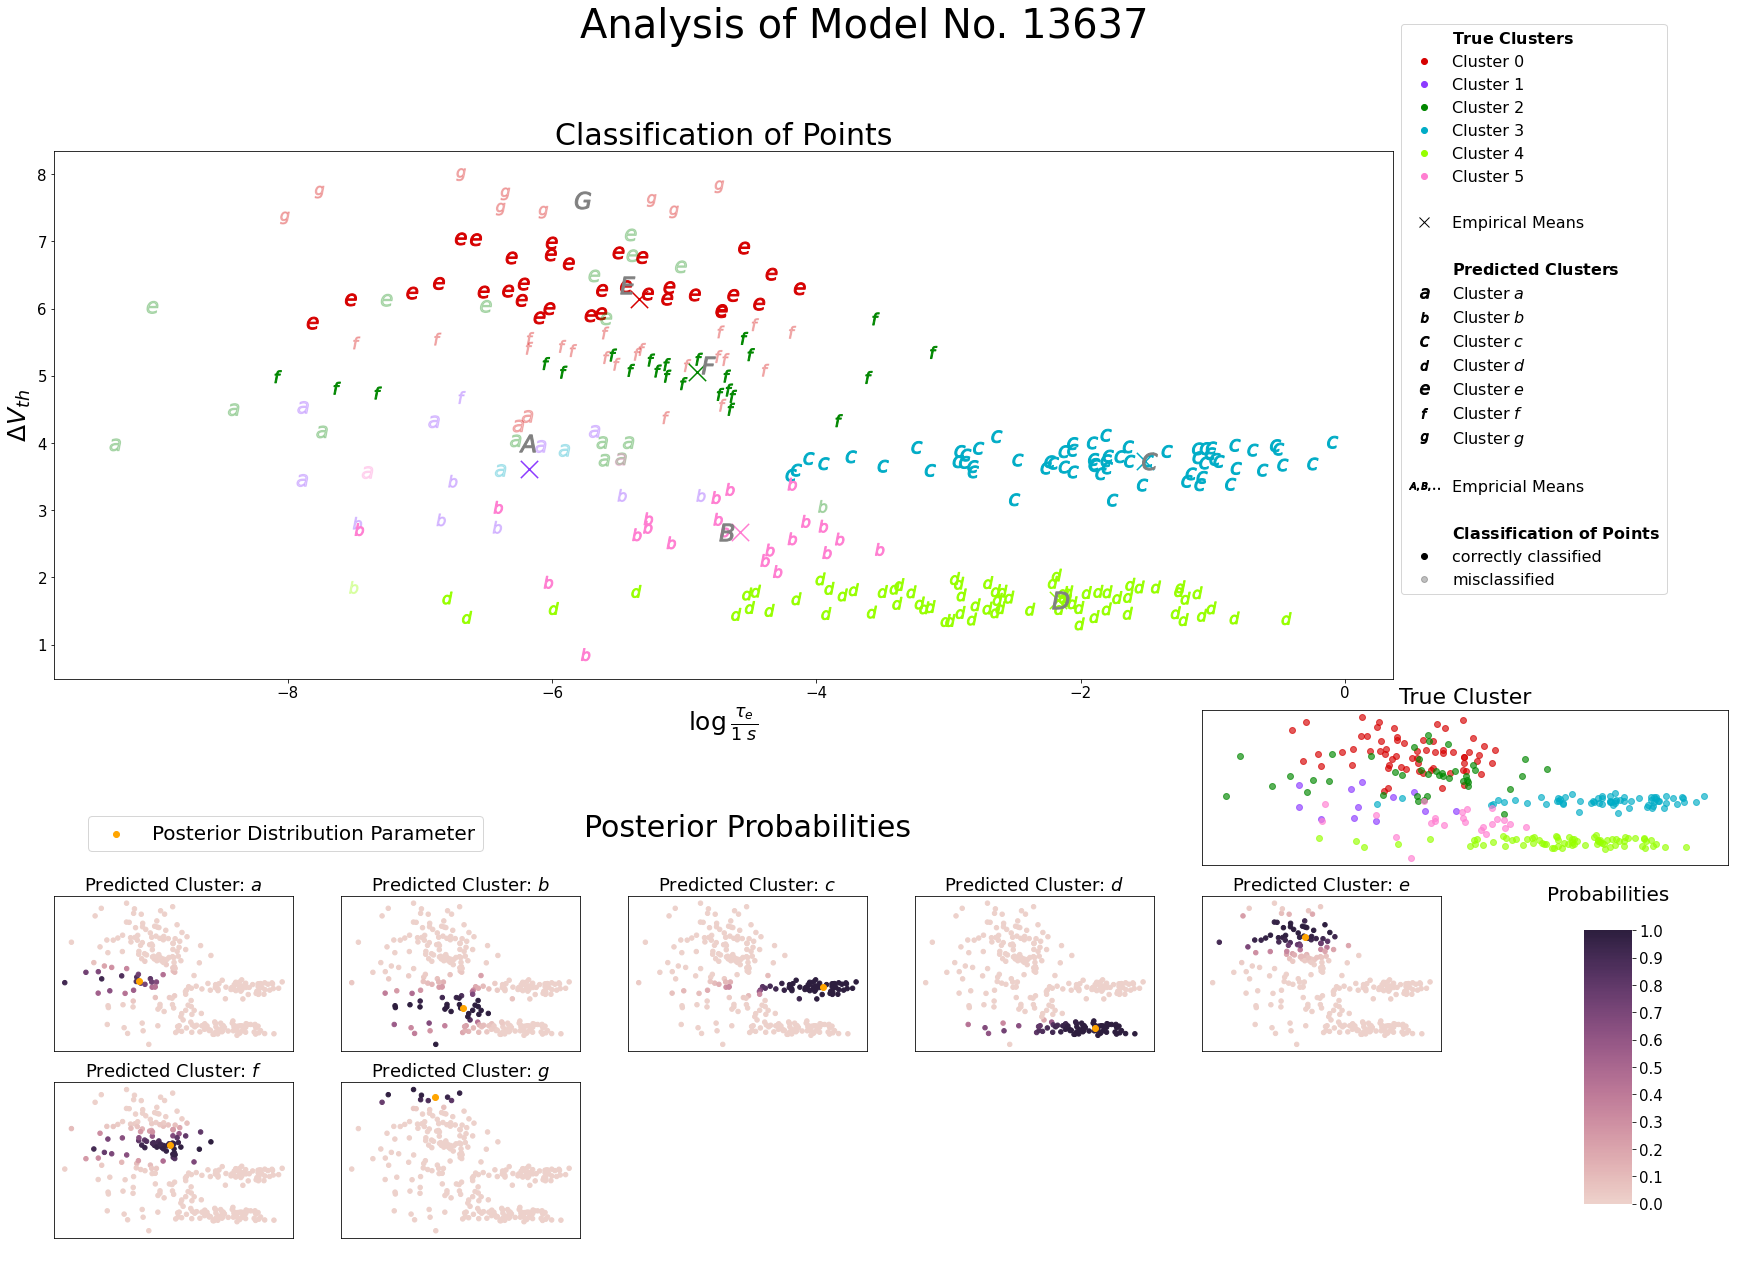

In [ ]:
from plotting.clustering_assessment.plot import plot_clustering_assessment
model_idx = 13637
#criterion = "TOTAL_rank"

plot_clustering_assessment(model_data, df_scores, model_idx)

In [ ]:
model_idx = 11464


from em.em_algorithm import compute_loglikelihood

compute_loglikelihood(df_clean[["x", "y"]].to_numpy(),model_data["inferred_mixtures"][model_idx] )

123.0992433574013

In [ ]:
def _clean_outliers(df_pred):
    df_pred_count_points = df_pred.groupby(["prediction_cluster"]).agg({"x": "count"}).reset_index() 
    useful_cluster = df_pred_count_points[df_pred_count_points.x >1].prediction_cluster
    df_pred_cleaned = df_pred[df_pred.prediction_cluster.isin(useful_cluster)]
    return df_pred_cleaned

In [ ]:
from mc_simulation.post_processing import get_prediction_df
df_predict = get_prediction_df(df_scores, model_data, model_idx)
df_clean = _clean_outliers(df_predict)

In [ ]:
len(df_predict)

247

In [ ]:
len(df_clean)

246